# SCRIPT DESCRIPTION

# IMPORTING LIBRARIES

In [1]:
# Please check to ensure that all of the libraries imported in functions_speller_analysis_simulated.py are installed
# in your environment or in the same file pathway. 
import functions_speller_analysis_simulated

# INPUTTING PARAMETERS

In [2]:
"""
DESCRIPTION:
Please input the parameters below.
"""

# EXPERIMENTER INPUTS
block_id          = 'Block1'
date              = '2023_01_06'
dir_intermediates = '/mnt/shared/danprocessing/Projects/PseudoOnlineTests_for_RTCoG/Intermediates/'
fps               = 30
n_votes           = 7
n_votes_thr       = 7
patient_id        = 'CC01'
task              = 'Speller'

if date == '2023_01_10' or date == '2023_01_12':
    fps = 60
    
"""
INPUT VARIABLES:
block_id:          [String]; Block ID of the task that was run. Should be format 'Block#'.
date:              [string (YYYY_MM_DD)]; Date on which the current block was run.
dir_intermediates: [string]; Intermediates directory where relevant information is stored.
fps:               [int]; Frames per second of click highlights array simulation from video feed.
n_votes:           [int]; Number of most recent classifications to consider when voting on whether a click should or 
                   should not be issued in real-time decoding simulation. For N number of votes, the voting window 
                   corresponds to N*packet size (unitless * ms) worth of data. For example, 7 votes with a packet size 
                   of 100 ms corresponds to 700 ms of worth of data being considered in the voting window.
n_votes_thr:       [int]; Number of grasp votes which must accumulate within the most recent n_votes classifications to
                   issue a click command.
patient_id:        [string]; Patient ID PYyyNnn or CCxx format, where y, n, and x are integers.
task:              [string]; Type of task that was run.
""";

In [3]:
# Initializing dictionary for storing click detections and false positives for across all voting thresholds.
n_click_dict = {}
n_fp_dict    = {}

# LOADING MEDIAPIPE HAND LANDMARK TRAJECTORIES

In [4]:
"""
DESCRIPTION:
Importing the xarray of hand trajectories. Note that these hand trajectories are curtailed between the block start and
stop times. The click array is loaded from:

dir_intermediates + patient_id + '/' + task + '/HandTrajectories/'  + date + '/Curtailed/ + 'date + '_' + block_id +
'_hand_trajectories.nc'

Feel free to modify the pathway in which these hand trajectories are stored and modify the necessary experimenter inputs
appropriately.

INPUT VARIABLES:
block_id:          [String (BlockX, where X is an int))]; Block ID of the task that was run.
date:              [string (YYYY_MM_DD)]; Date on which the block was run.
dir_intermediates: [string]; Intermediates directory where relevant information is stored.
patient_id:        [string]; Patient ID PYyyNnn or CCxx format, where y, n, and x are integers.
task:              [string]; Type of task that was run.

OUTPUT VARIABLES:
hand_trajectories: [xarray (landmarks, time samples) > floats]; The time traces of the x- and y-coordinates for each 
                   landmark. The time domain is in units of seconds. 
"""

# COMPUTATION:

# Loading the hand trajectories.
hand_trajectories = functions_speller_analysis_simulated.load_hand_trajectories(block_id, date, dir_intermediates,\
                                                                                patient_id, task)


HAND TRAJECTORIES ARRAY
<xarray.DataArray (landmarks: 42, time_seconds: 26846)>
array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [-0.10574713, -0.10804598, -0.10550459, ..., -0.117506  ,
        -0.12019231, -0.12348668],
       ...,
       [ 0.58850575,  0.5908046 ,  0.59174312, ...,  0.61390887,
         0.61778846,  0.61985472],
       [ 0.48045977,  0.48275862,  0.47706422, ...,  0.45323741,
         0.45192308,  0.45520581],
       [ 0.69885057,  0.70114943,  0.70183486, ...,  0.72661871,
         0.73317308,  0.73607748]])
Coordinates:
  * landmarks     (landmarks) object 'WRIST_x' 'WRIST_y' ... 'PINKY_TIP_y'
  * time_seconds  (time_seconds) float64 31.67 31.7 31.73 ... 926.4 926.5 926.5

HAND LANDMARKS LIST:
['WRIST_x',
 'WRIST_y',
 'THUMB_CMC_x',
 'THUMB_CMC_y',
 'THUMB_MCP_x',
 'THUMB_MCP_y',
 'THUMB_IP_x',
 'THUMB_IP_y',

# LOADING CLICK INFORMATION

In [5]:
"""
DESCRIPTION:
Loading the simulated click trace. Note that the simulation does not make a distinction between whether a row click, 
column click, or backspace click occurred, because there does not exist a corresponding video from which this 
distinction could be make.

dir_intermediates + patient_id + '/' + task + '/ClickDetections/Simulated/' + date + '/' + block_id + '/' +
str(n_votes) + '_vote_window_' + str(n_votes_thr) + '_vote_thr' + '/' + date + '_' + block_id + 
'_click_highlights_video.nc'

Feel free to modify the pathway in which this simulated click information is stored and modify the necessary 
experimenter inputs appropriately.

INPUT VARIABLES:
block_id:          [String (BlockX, where X is an int))]; Block ID of the task that was run.
date:              [string (YYYY_MM_DD)]; Date on which the block was run.
dir_intermediates: [string]; Intermediates directory where relevant information is stored.
n_votes:           [int]; Number of most recent classifications to consider when voting on whether a click should or 
                   should not be issued in real-time decoding simulation. For N number of votes, the voting window 
                   corresponds to N*packet size (unitless * ms) worth of data. For example, 7 votes with a packet size 
                   of 100 ms corresponds to 700 ms of worth of data being considered in the voting window.
n_votes_thr:       [int]; Number of grasp votes which must accumulate within the most recent n_votes classifications to
                   issue a click command.
patient_id:        [string]; Patient ID PYyyNnn or CCxx format, where y, n, and x are integers.
task:              [string]; Type of task that was run.

OUTPUT VARIABLES:
click_trace: [xarray (time samples,)> strings]; At the video resolution, there exists a click or no-click entry. Time 
             dimension is in units of seconds at video resolution.
"""

# COMPUTATION:

# Loading the click information.
click_trace = functions_speller_analysis_simulated.load_click_information(block_id, date, dir_intermediates, n_votes,\
                                                                          n_votes_thr, patient_id, task)



CLICK TRACE:
<xarray.DataArray (time_seconds: 26846)>
array(['nothing', 'nothing', 'nothing', ..., 'click', 'click', 'click'],
      dtype=object)
Coordinates:
  * time_seconds  (time_seconds) float64 31.67 31.7 31.73 ... 926.4 926.5 926.5


# REFERENCING THE HAND TRACES TO THE PINKY AND THUMB

In [6]:
"""
DESCRIPTION:
Each hand landmark is referenced according to experimenter-specified landmarks. Make sure that the landmarks that are
selected will not be used for further analysis as they will get normalized out to 0.
"""

# EXPERIMENTER INPUT:
ref1_x = 'PINKY_MCP_x'
ref2_x = 'THUMB_MCP_x'
refa_y = 'THUMB_MCP_y'
refb_y = 'THUMB_TIP_y'

"""
INPUT VARIABLES:
hand_trajectories: [xarray (landmarks, time samples) > floats]; The time traces of the x- and y-coordinates for each 
                   landmark. The time domain is in units of seconds. 
ref1_x:            [string]; First horizontal reference landmark
ref2_x:            [string]; Second horizontal reference landmark
refa_y:            [string]; First vertical reference landmark
refb_y:            [string]; Second vertical reference landmark

OUTPUT VARIABLES:
hand_trajectories_ref: [xarray (landmarks, time samples) > floats]; The trajectories of the x- and y- coordinates for 
                       each landmark. These are referenced in the x- and y-dimensions according to the reference 
                       landmarks. The time domain is in units of seconds. 
"""

# COMPUTATION:

# Normalizing hand trajectories.
hand_trajectories_ref = functions_speller_analysis_simulated.referencing_hand_trajectories(hand_trajectories, ref1_x,\
                                                                                           ref2_x, refa_y, refb_y)


# EXTRACTING ONLY RELEVANT LANDMARKS

In [7]:
"""
DESCRIPTION:
For each movement type, the experimenter enters the most relevant hand landmarks for visualization. The experimenter
creates a relevant_landmarks dictionary where the keys of the dictionary are the possible movement classes and the value
for each key is a list of the most relevant hand landmarks to that class.
"""

# EXPERIMENTER INPUTS:
relevant_landmarks = {
                      'grasp': ['MIDDLE_FINGER_MCP_x',\
                                'MIDDLE_FINGER_MCP_y',\
                                'MIDDLE_FINGER_PIP_x',\
                                'MIDDLE_FINGER_PIP_y',\
                                'MIDDLE_FINGER_DIP_x',\
                                'MIDDLE_FINGER_DIP_y',\
                                'MIDDLE_FINGER_TIP_x',\
                                'MIDDLE_FINGER_TIP_y',\
                                'RING_FINGER_MCP_x',\
                                'RING_FINGER_MCP_y',\
                                'RING_FINGER_PIP_x',\
                                'RING_FINGER_PIP_y',\
                                'RING_FINGER_DIP_x',\
                                'RING_FINGER_DIP_y',\
                                'RING_FINGER_TIP_x',\
                                'RING_FINGER_TIP_y']
                     }

"""
INPUT VARIABLES:
hand_trajectories_ref: [xarray (landmarks, time samples) > floats]; The trajectories of the x- and y- coordinates for 
                       each landmark. These are referenced in the x- and y-dimensions according to the reference 
                       landmarks. The time domain is in units of seconds. 
relevant_landmarks:    [dictionary (key: string (movement type); Value: list > strings (hand landmarks))]; Each movement
                       holds a list of the most useful landmarks used to detect the corresponding movement type.
                         
OUTPUT VARIABLES:
hand_trajectories_rel: [dictionary (Key: string (movement type); Value: xarray (relevant landmarks x time samples)
                       > floats]; For each movement type, only the relevant hand trajectories are stored. The time
                       dimension of each xarray is in units of s.
                         
"""

# COMPUTATION:

# Extracting only the relevant hand trajectories for each movement.
hand_trajectories_rel = functions_speller_analysis_simulated.extracting_relevant_trajectories(hand_trajectories_ref,\
                                                                                              relevant_landmarks)


# UPLOADING DICTIONARY WITH MOVEMENT ONSET/OFFSET TIMES

In [8]:
"""
DESCRIPTION:
The dictionary containing the movement onset and offset times for each movement type will be uploaded if it exists. This
dictionary would contain the previously saved movement onset/offset times for each movement. If there are no previously 
saved onset/offset times for a particular movement (or all movements) a dictionary will be initiated and saved for 
current and future inputting of onset/offset times. If it exists, the dictionary is loaded from:

dir_intermediates + patient_id + '/' + task + '/MovementOnsetsAndOffsets/' + date + '/' + 'dict_OnsetOffset_' + block_id

Feel free to modify the pathway in which this movement onset/offset dictionary is stored and modify the necessary
experimenter inputs appropriately.

INPUT VARIABLES:
block_id:          [String (BlockX, where X is an int))]; Block ID of the task that was run.
date:              [string (YYYY_MM_DD)]; Date on which the block was run.
dir_intermediates: [string]; Intermediates directory where relevant information is stored.
patient_id:        [string]; Patient ID PYyyNnn or CCxx format, where y, n, and x are integers.
task:              [string]; Type of task that was run.

OUTPUT VARIABLES:
movement_onsetsoffsets: [dictionary (key: string (movement); Value: list > list [t_onset, t_offset] > floats)]; The 
                        dictionary containing all movement onset and offset times for each movement type.
"""

# Uploading the dictionary with movement onset and offsets.
movement_onsetsoffsets = functions_speller_analysis_simulated.upload_movement_onsetsoffsets(block_id, date,\
                                                                                            dir_intermediates,\
                                                                                            patient_id, task)


{'grasp': [[34.43333333333334, 34.93333333333333],
           [37.1, 37.6],
           [41.733333333333334, 42.266666666666666],
           [43.56666666666667, 44.06666666666666],
           [54.1, 54.699999999999996],
           [56.766666666666666, 57.33333333333333],
           [62.6, 63.13333333333333],
           [69.26666666666667, 69.8],
           [73.93333333333334, 74.46666666666667],
           [85.83333333333333, 86.33333333333333],
           [93.43333333333334, 93.96666666666667],
           [100.06666666666666, 100.63333333333333],
           [102.9, 103.39999999999999],
           [105.13333333333334, 105.39999999999999],
           [108.83333333333333, 109.53333333333333],
           [113.46666666666667, 114.0],
           [118.7, 119.2],
           [121.36666666666667, 121.86666666666666],
           [125.96666666666667, 126.63333333333333],
           [127.9, 128.43333333333334],
           [136.63333333333333, 137.16666666666666],
           [138.2, 138.766666666666

# ZOOMING IN

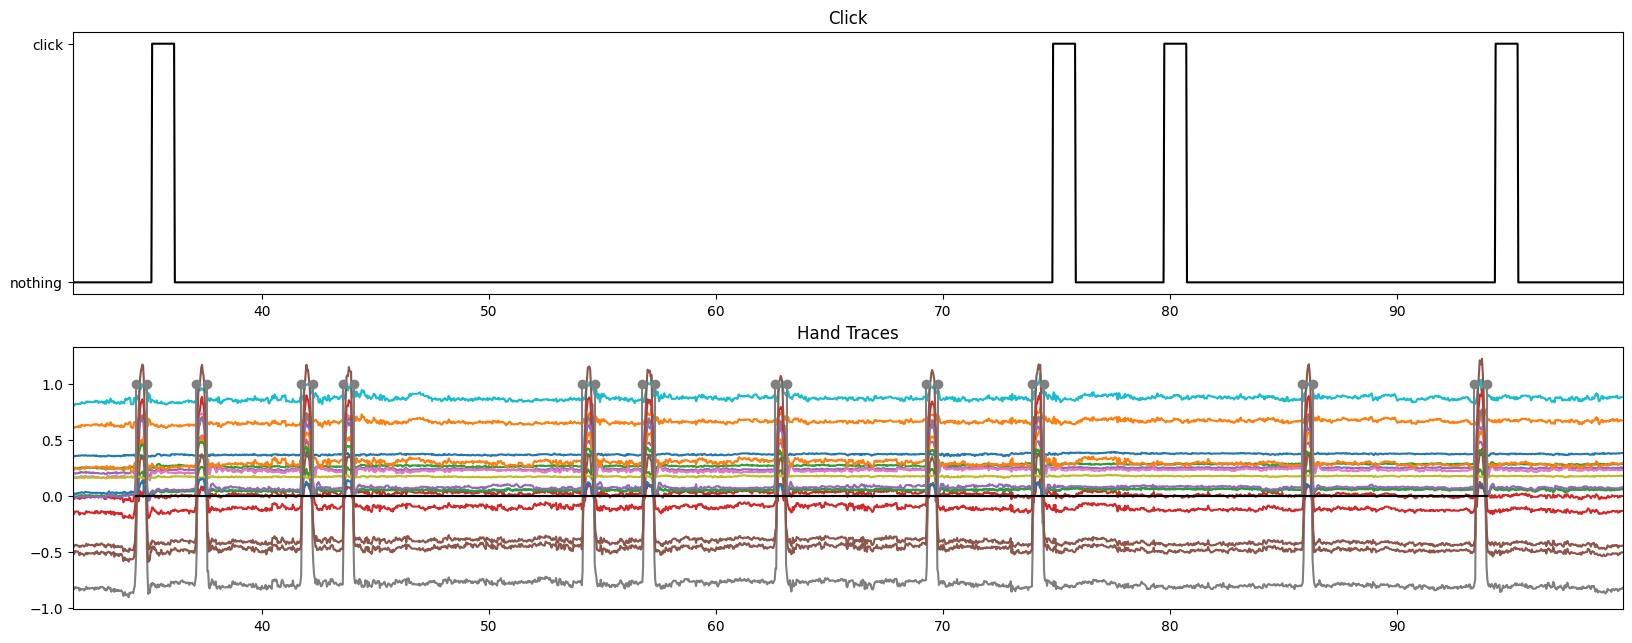

In [9]:
"""
DESCRIPTION:
Zooming in on the experimenter-specified time period of the hand traces and click trace.
"""

# EXPERIMENTER INPUTS:
movement     = 'grasp'
t_start_view = 0
t_end_view   = 100

"""
INPUT VARIABLES:
click_trace:            [xarray (time samples,)> strings]; At the video resolution, there exists a click or no-click 
                        entry. Time dimension is in units of seconds at video resolution.
hand_trajectories_rel:  [dictionary (Key: string (movement type); Value: xarray (relevant landmarks x time samples)
                        > floats]; For each movement type, only the relevant hand trajectories are stored. The time
                        dimension of each xarray is in units of s.
movement_onsetsoffsets: [dictionary (key: string (movement); Value: list > list [t_onset, t_offset] > floats)]; The 
                        dictionary containing all movement onset and offset times for each movement type.
movement:               [string]; The movement from which the onsets and offsets will be extracted.
t_end_view:             [float (units: s)]; The ending point of the visualization window.
t_start_view:           [float (units: s)]; The starting point of the visualization window.
"""

# COMPUTATION:

# Zooming in to the experimenter-specified period.
functions_speller_analysis_simulated.zooming_in(click_trace, hand_trajectories_rel, movement, movement_onsetsoffsets,\
                                                t_end_view, t_start_view)


# EXTRACTING CLICK ONSETS

In [10]:
"""
DESCRIPTION:
Producing the arrays of command onsets and offsets.

INPUT VARIABLES:
click_trace: [xarray (time samples,)> strings]; At the video resolution, there exists a click or no-click entry. Time 
             dimension is in units of seconds at video resolution.

NECESSARY FUNCTIONS:
unique_value_index_finder

OUTPUT VARIABLES:
t_click_onsets:  [array > floats (units: s)]; The times the click changes from 0 to 1. 
"""

# COMPUTATION:

# Extracting the click onset times.
t_click_onsets, _ = functions_speller_analysis_simulated.extracting_click_onset_offset_times(click_trace)


['click', 'nothing']


# COMPUTING LATENCIES AND TRUE POSITIVES

Miss:  37.1
Miss:  41.733
Miss:  43.567
Miss:  54.1
Miss:  56.767
Miss:  62.6
Miss:  69.267
Miss:  85.833
Miss:  102.9
Miss:  105.133
Miss:  108.833
Miss:  113.467
Miss:  121.367
Miss:  127.9
Miss:  138.2
Miss:  144.333
Miss:  158.033
Miss:  169.1
Miss:  171.767
Miss:  177.5
Miss:  180.233
Miss:  184.833
Miss:  186.7
Miss:  191.5
Miss:  193.367
Miss:  202.133
Miss:  204.933
Miss:  209.333
Miss:  212.1
Miss:  217.033
Miss:  222.8
Miss:  235.533
Miss:  244.933
Miss:  246.633
Miss:  253.4
Miss:  255.033
Miss:  260.033
Miss:  274.5
Miss:  280.333
Miss:  286.067
Miss:  287.7
Miss:  297.5
Miss:  308.667
Miss:  319.933
Miss:  321.567
Miss:  326.7
Miss:  335.4
Miss:  339.1
Miss:  347.533
Miss:  353.167
Miss:  374.233
Miss:  385.467
Miss:  391.533
Miss:  411.6
Miss:  413.2
Miss:  417.833
Miss:  419.633
Miss:  438.467
Miss:  444.4
Miss:  451.033
Miss:  459.067
Miss:  476.067
Miss:  484.267
Miss:  489.9
Miss:  491.567
Miss:  504.1
Miss:  508.867
Miss:  515.133
Miss:  527.867
Miss:  529.367
Miss: 

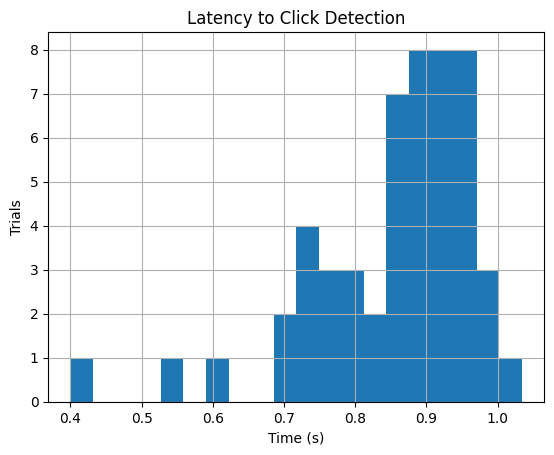

In [11]:
"""
DESCRIPTION:
Computing the latency from movement onset to click and the resulting sensitivity. The sensitivity is defined as the 
number of true positives over the number of all click detectiosn, where a true positive must occur within the 
experimenter-defined time post-movement onset.
"""
# EXPERIMENTER INPUTS:
t_after_movement_limit = 1.5

"""
INPUT VARIABLES:
movement:               [string]; The movement from which the onsets and offsets will be extracted.
movement_onsetsoffsets: [dictionary (key: string (movement); Value: list > list [t_onset, t_offset] > floats)]; The 
                        dictionary containing all movement onset and offset times for each movement type.
patient_id:             [string]; Patient ID PYyyNnn or CCxx format, where y, n, and x are integers.
t_after_movement_limit: [float (unit: s)]; Amount of time from movement onset that can pass for a click to occur and be
                        associated with the movement onset.
t_click_onsets:         [array > floats (units: s)]; The times the click changes from 0 to 1.

OUTPUT VARIABLES:
n_clicks:          [int]; Number of detected clicks.
t_click_latencies: [array > floats (units: s)]; Latencies of all detected clicks relative to corresponding movement 
                   onset.
"""
    
# COMPUTATION:

# Computing total number of clicks and click latencies.
n_clicks,\
t_click_latencies = functions_speller_analysis_simulated.computing_latency_and_tp(movement, movement_onsetsoffsets,\
                                                                                  patient_id, t_after_movement_limit,\
                                                                                  t_click_onsets)
# Updating the dictionary of clicks.
n_click_dict[str(n_votes_thr) + '_thr'] = n_clicks


# SAVING CLICK LATENCIES

In [12]:
"""
DESCRIPTION:
Saving click latencies for this block to array of latencies from all other blocks recorded on the current date. This is
for computing across-block error for average mean latencies. Latencies are saved in the following pathway:

dir_intermediates + patient_id + '/Speller/ClickLatencies/Simulated/' + date + '/' + date + '_' + block_id 
+ '_click_latencies.txt'

INPUT VARIABLES:
block_id:          [String]; Block ID of the task that was run. Should be format 'Block#'.
date:              [string (YYYY_MM_DD)]; Date on which the current block was run.
dir_intermediates: [string]; Intermediates directory where relevant information is stored.
movement:          [string]; The movement from which the onsets and offsets will be extracted.
patient_id:        [string]; Patient ID PYyyNnn or CCxx format, where y, n, and x are integers.
t_click_latencies: [array > floats (units: s)]; Latencies of all detected clicks relative to corresponding movement 
                   onset.
task:              [string]; Type of task that was run.
"""

# COMPUTATION:

# Saving the click latencies.
functions_speller_analysis_simulated.saving_click_latencies(block_id, date, dir_intermediates, movement, patient_id,\
                                                            t_click_latencies, task)

# COMPUTING FALSE POSITIVES

In [13]:
"""
DESCRIPTION:
Counting the number of clicks that occur without any corresponding movement (outside the click limit window).

INPUT VARIABLES:
movement:               [string]; The movement from which the onsets and offsets will be extracted.
movement_onsetsoffsets: [dictionary (key: string (movement); Value: list > list [t_onset, t_offset] > floats)]; The 
                        dictionary containing all movement onset and offset times for each movement type.
t_after_movement_limit: [float (unit: s)]; Amount of time from movement onset that can pass for a click to occur 
                        and be associated with the movement onset.
t_click_onsets:         [array > floats (units: s)]; The times the click changes from 0 to 1. 

OUTPUT VARIABLES:
n_fp: [int]; Total number of false positives for the current block of the session.
"""

# COMPUTATION:

# Computing false positives
n_fp = functions_speller_analysis_simulated.computing_fp(movement, movement_onsetsoffsets, t_after_movement_limit,\
                                                         t_click_onsets)

# Updating the dictionary of false positives.
n_fp_dict[str(n_votes_thr) + '_thr'] = n_fp


False Positives?
79.77
776.27
861.17



CLICK TRACE:
<xarray.DataArray (time_seconds: 26846)>
array(['nothing', 'nothing', 'nothing', ..., 'click', 'click', 'click'],
      dtype=object)
Coordinates:
  * time_seconds  (time_seconds) float64 31.67 31.7 31.73 ... 926.4 926.5 926.5
['click', 'nothing']
Miss:  41.733
Miss:  43.567
Miss:  85.833
Miss:  102.9
Miss:  105.133
Miss:  108.833
Miss:  113.467
Miss:  127.9
Miss:  138.2
Miss:  144.333
Miss:  171.767
Miss:  177.5
Miss:  180.233
Miss:  184.833
Miss:  193.367
Miss:  204.933
Miss:  209.333
Miss:  212.1
Miss:  217.033
Miss:  222.8
Miss:  235.533
Miss:  244.933
Miss:  246.633
Miss:  255.033
Miss:  274.5
Miss:  280.333
Miss:  286.067
Miss:  321.567
Miss:  339.1
Miss:  413.2
Miss:  417.833
Miss:  419.633
Miss:  438.467
Miss:  451.033
Miss:  459.067
Miss:  476.067
Miss:  484.267
Miss:  491.567
Miss:  508.867
Miss:  515.133
Miss:  538.2
Miss:  557.9
Miss:  565.467
Miss:  573.0
Miss:  577.633
Miss:  583.233
Miss:  587.9
Miss:  589.767
Miss:  604.933
Miss:  607.767
Miss:  613.433
Mi

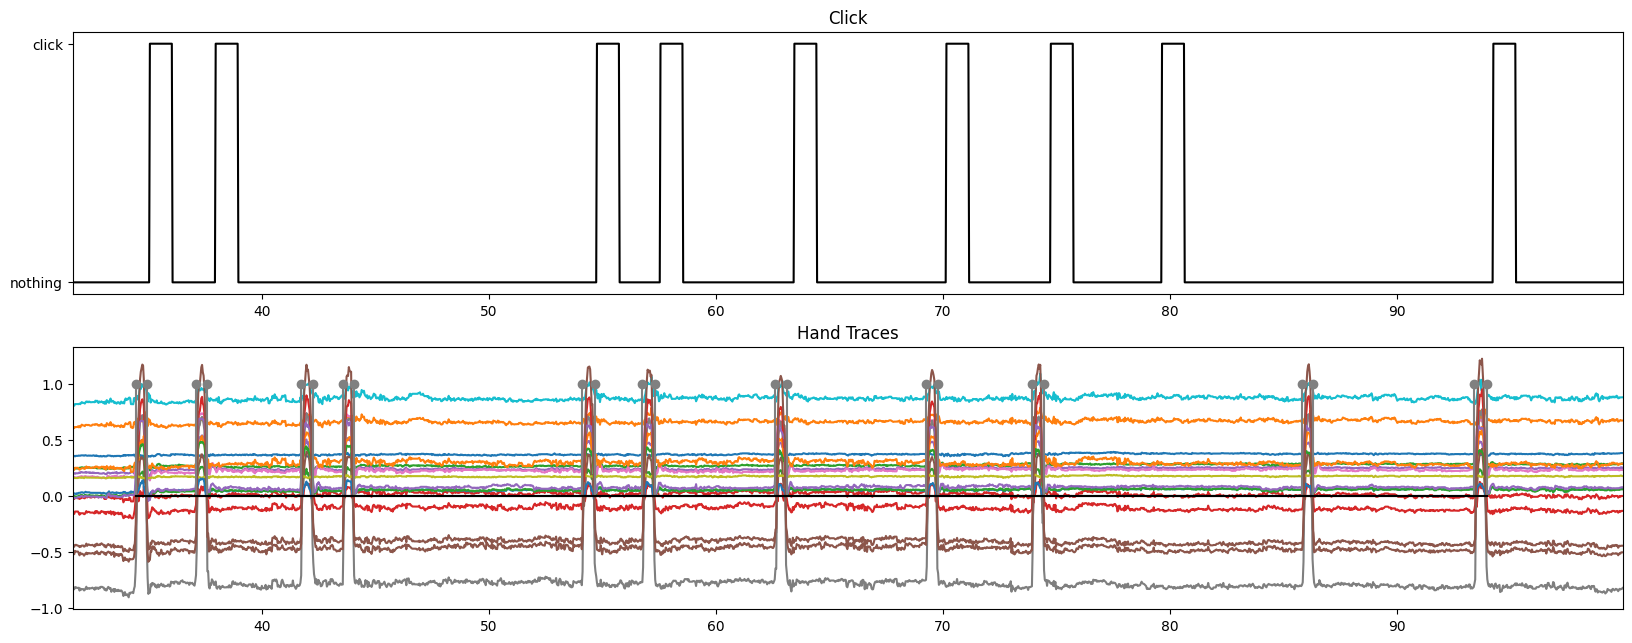

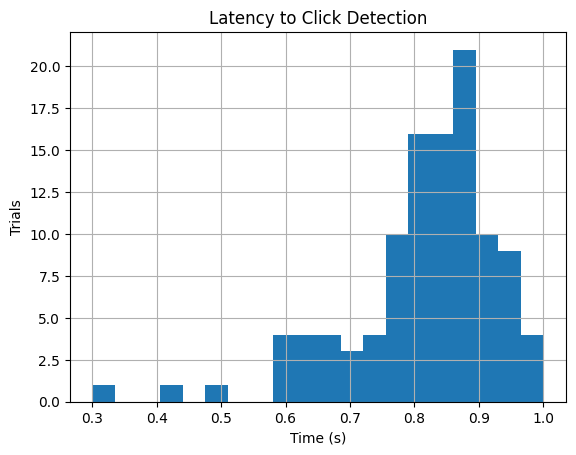

In [14]:
n_votes_thr = 6

# LOADING CLICK INFORMATION
click_trace = functions_speller_analysis_simulated.load_click_information(block_id, date, dir_intermediates, n_votes,\
                                                                          n_votes_thr, patient_id, task)

# ZOOMING IN
functions_speller_analysis_simulated.zooming_in(click_trace, hand_trajectories_rel, movement, movement_onsetsoffsets,\
                                                t_end_view, t_start_view)

# EXTRACTING CLICK ONSETS
t_click_onsets, _ = functions_speller_analysis_simulated.extracting_click_onset_offset_times(click_trace)

# COMPUTING LATENCIES AND TRUE POSITIVES
n_clicks,\
t_click_latencies = functions_speller_analysis_simulated.computing_latency_and_tp(movement, movement_onsetsoffsets,\
                                                                                  patient_id, t_after_movement_limit,\
                                                                                  t_click_onsets)

# COMPUTING FALSE POSITIVES
n_fp = functions_speller_analysis_simulated.computing_fp(movement, movement_onsetsoffsets, t_after_movement_limit,\
                                                         t_click_onsets)

n_click_dict[str(n_votes_thr) + '_thr'] = n_clicks

n_fp_dict[str(n_votes_thr) + '_thr'] = n_fp



CLICK TRACE:
<xarray.DataArray (time_seconds: 26846)>
array(['nothing', 'nothing', 'nothing', ..., 'click', 'click', 'click'],
      dtype=object)
Coordinates:
  * time_seconds  (time_seconds) float64 31.67 31.7 31.73 ... 926.4 926.5 926.5
['click', 'nothing']
Miss:  41.733
Miss:  102.9
Miss:  105.133
Miss:  113.467
Miss:  127.9
Miss:  144.333
Miss:  177.5
Miss:  184.833
Miss:  193.367
Miss:  204.933
Miss:  212.1
Miss:  217.033
Miss:  222.8
Miss:  246.633
Miss:  255.033
Miss:  274.5
Miss:  286.067
Miss:  321.567
Miss:  339.1
Miss:  413.2
Miss:  417.833
Miss:  419.633
Miss:  476.067
Miss:  484.267
Miss:  515.133
Miss:  538.2
Miss:  573.0
Miss:  577.633
Miss:  583.233
Miss:  587.9
Miss:  589.767
Miss:  604.933
Miss:  744.3
Miss:  772.267
Miss:  870.333
Miss:  875.8
Miss:  910.8
N grasps:  176
N clicks:  139
Sensitivity:  78.98
Mean Latency to Command:  0.721
Stdev Latency to Command:  0.117
False Positives?
71.67
79.57
315.17
429.37
776.07
802.77
860.97
864.67


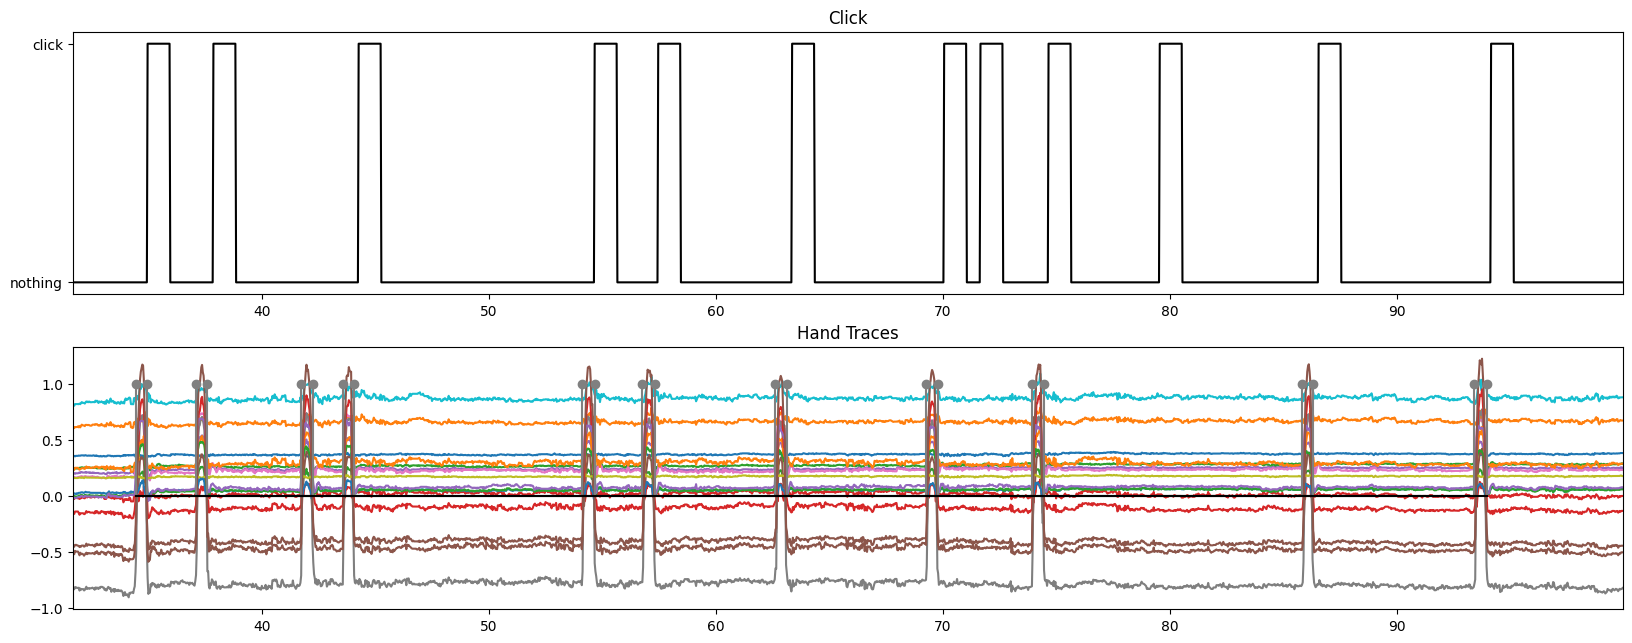

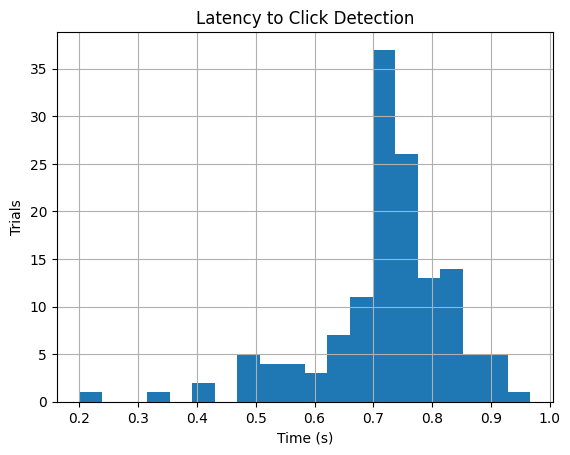

In [15]:
n_votes_thr = 5

# LOADING CLICK INFORMATION
click_trace = functions_speller_analysis_simulated.load_click_information(block_id, date, dir_intermediates, n_votes,\
                                                                          n_votes_thr, patient_id, task)

# ZOOMING IN
functions_speller_analysis_simulated.zooming_in(click_trace, hand_trajectories_rel, movement, movement_onsetsoffsets,\
                                                t_end_view, t_start_view)

# EXTRACTING CLICK ONSETS
t_click_onsets, _ = functions_speller_analysis_simulated.extracting_click_onset_offset_times(click_trace)

# COMPUTING LATENCIES AND TRUE POSITIVES
n_clicks,\
t_click_latencies = functions_speller_analysis_simulated.computing_latency_and_tp(movement, movement_onsetsoffsets,\
                                                                                  patient_id, t_after_movement_limit,\
                                                                                  t_click_onsets)

# COMPUTING FALSE POSITIVES
n_fp = functions_speller_analysis_simulated.computing_fp(movement, movement_onsetsoffsets, t_after_movement_limit,\
                                                         t_click_onsets)

n_click_dict[str(n_votes_thr) + '_thr'] = n_clicks

n_fp_dict[str(n_votes_thr) + '_thr'] = n_fp



CLICK TRACE:
<xarray.DataArray (time_seconds: 26846)>
array(['nothing', 'nothing', 'nothing', ..., 'click', 'click', 'click'],
      dtype=object)
Coordinates:
  * time_seconds  (time_seconds) float64 31.67 31.7 31.73 ... 926.4 926.5 926.5
['click', 'nothing']
Miss:  41.733
Miss:  102.9
Miss:  105.133
Miss:  113.467
Miss:  127.9
Miss:  144.333
Miss:  177.5
Miss:  217.033
Miss:  222.8
Miss:  246.633
Miss:  255.033
Miss:  321.567
Miss:  413.2
Miss:  417.833
Miss:  419.633
Miss:  476.067
Miss:  484.267
Miss:  538.2
Miss:  583.233
Miss:  589.767
Miss:  604.933
Miss:  772.267
Miss:  875.8
Miss:  910.8
N grasps:  176
N clicks:  152
Sensitivity:  86.36
Mean Latency to Command:  0.629
Stdev Latency to Command:  0.124
False Positives?
71.57
79.47
207.17
315.07
429.27
503.07
775.97
800.87
802.67
860.87
862.57
864.57
897.27


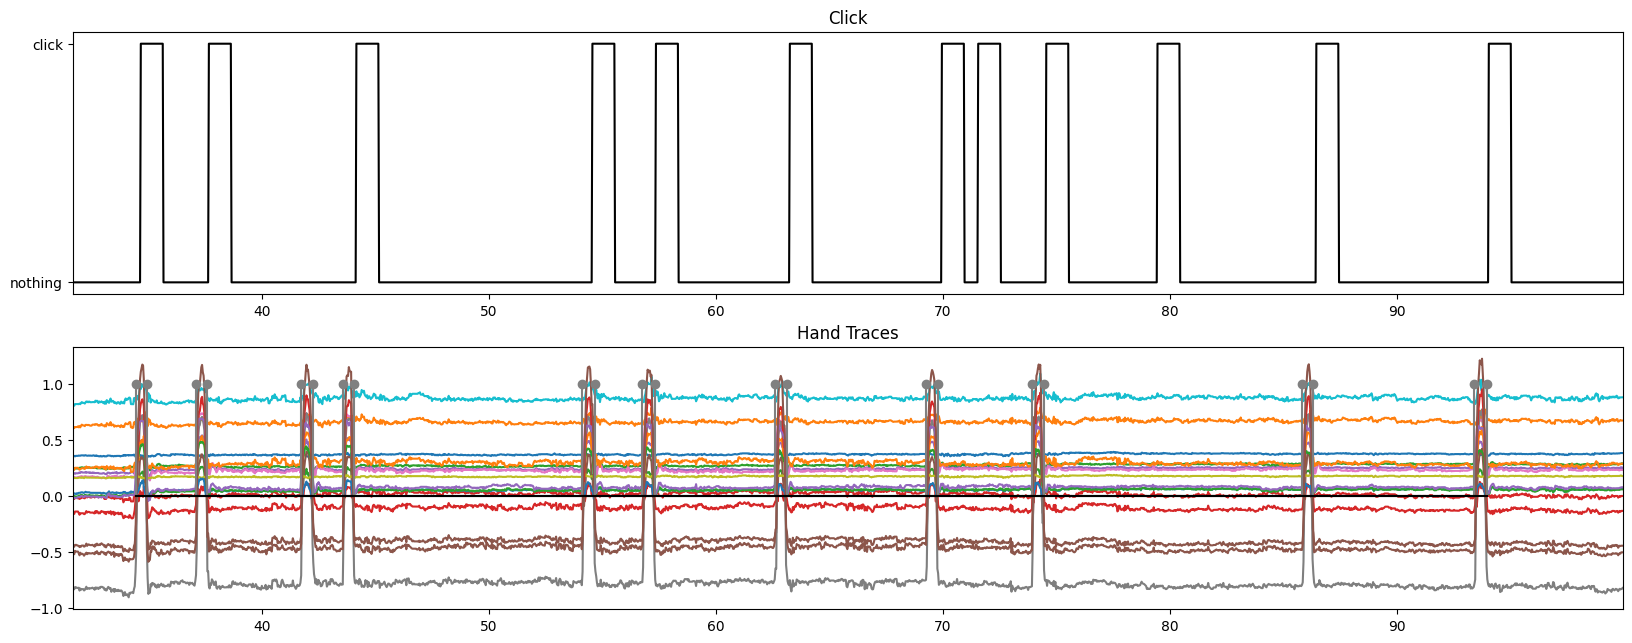

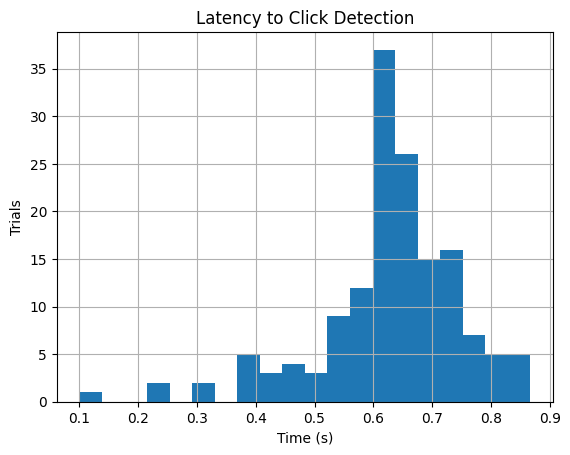

In [16]:
n_votes_thr = 4

# LOADING CLICK INFORMATION
click_trace = functions_speller_analysis_simulated.load_click_information(block_id, date, dir_intermediates, n_votes,\
                                                                          n_votes_thr, patient_id, task)

# ZOOMING IN
functions_speller_analysis_simulated.zooming_in(click_trace, hand_trajectories_rel, movement, movement_onsetsoffsets,\
                                                t_end_view, t_start_view)

# EXTRACTING CLICK ONSETS
t_click_onsets, _ = functions_speller_analysis_simulated.extracting_click_onset_offset_times(click_trace)

# COMPUTING LATENCIES AND TRUE POSITIVES
n_clicks,\
t_click_latencies = functions_speller_analysis_simulated.computing_latency_and_tp(movement, movement_onsetsoffsets,\
                                                                                  patient_id, t_after_movement_limit,\
                                                                                  t_click_onsets)

# COMPUTING FALSE POSITIVES
n_fp = functions_speller_analysis_simulated.computing_fp(movement, movement_onsetsoffsets, t_after_movement_limit,\
                                                         t_click_onsets)

n_click_dict[str(n_votes_thr) + '_thr'] = n_clicks

n_fp_dict[str(n_votes_thr) + '_thr'] = n_fp



CLICK TRACE:
<xarray.DataArray (time_seconds: 26846)>
array(['nothing', 'nothing', 'nothing', ..., 'click', 'click', 'click'],
      dtype=object)
Coordinates:
  * time_seconds  (time_seconds) float64 31.67 31.7 31.73 ... 926.4 926.5 926.5
['click', 'nothing']
Miss:  41.733
Miss:  102.9
Miss:  105.133
Miss:  113.467
Miss:  177.5
Miss:  217.033
Miss:  222.8
Miss:  255.033
Miss:  413.2
Miss:  417.833
Miss:  419.633
Miss:  476.067
Miss:  538.2
Miss:  604.933
Miss:  875.8
N grasps:  176
N clicks:  161
Sensitivity:  91.48
Mean Latency to Command:  0.537
Stdev Latency to Command:  0.133
False Positives?
36.47
58.77
71.47
79.37
80.57
207.07
248.57
314.97
429.17
502.97
775.87
790.07
797.17
800.77
802.57
833.27
860.77
862.47
864.47
897.17


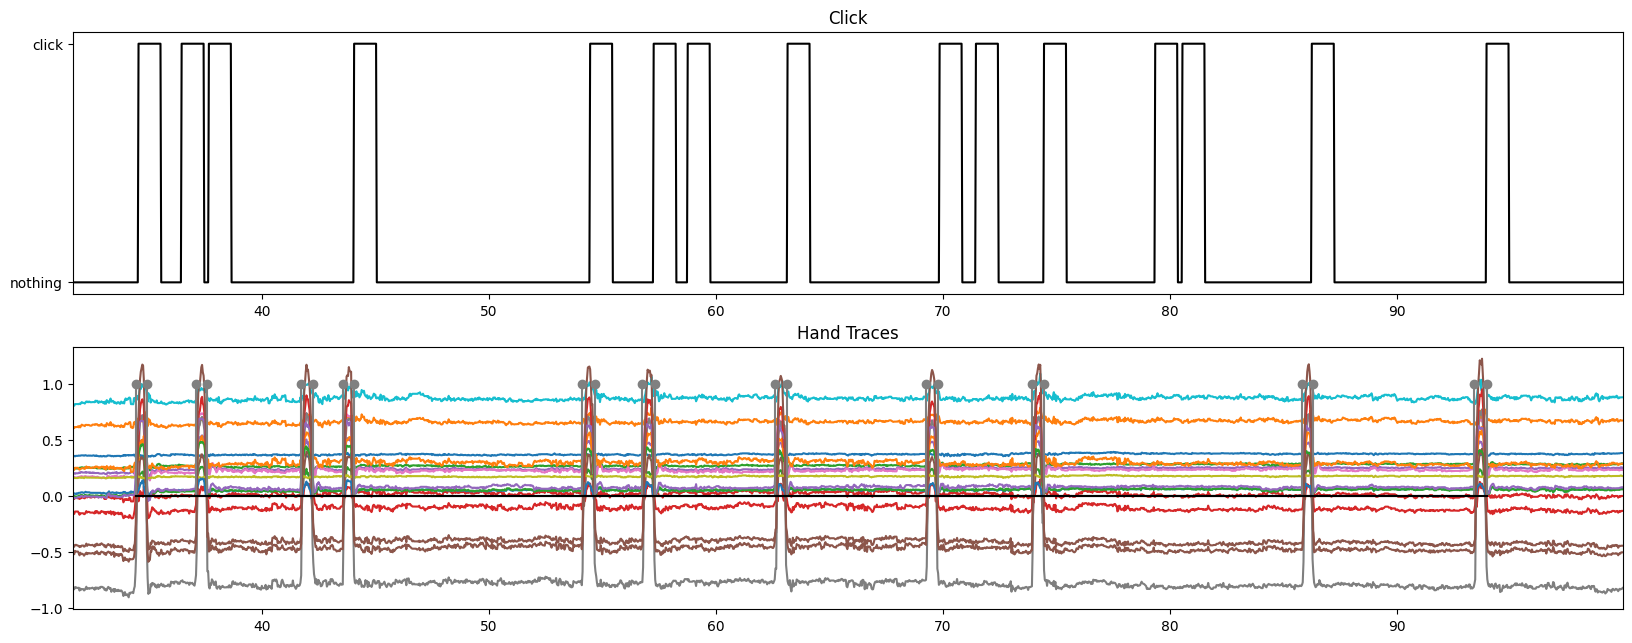

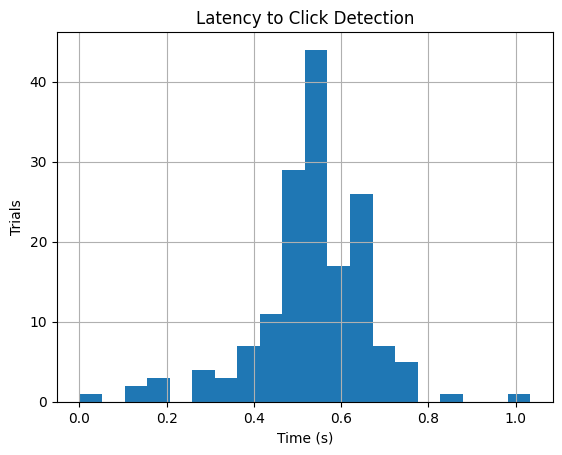

In [17]:
n_votes_thr = 3

# LOADING CLICK INFORMATION
click_trace = functions_speller_analysis_simulated.load_click_information(block_id, date, dir_intermediates, n_votes,\
                                                                          n_votes_thr, patient_id, task)

# ZOOMING IN
functions_speller_analysis_simulated.zooming_in(click_trace, hand_trajectories_rel, movement, movement_onsetsoffsets,\
                                                t_end_view, t_start_view)

# EXTRACTING CLICK ONSETS
t_click_onsets, _ = functions_speller_analysis_simulated.extracting_click_onset_offset_times(click_trace)

# COMPUTING LATENCIES AND TRUE POSITIVES
n_clicks,\
t_click_latencies = functions_speller_analysis_simulated.computing_latency_and_tp(movement, movement_onsetsoffsets,\
                                                                                  patient_id, t_after_movement_limit,\
                                                                                  t_click_onsets)

# COMPUTING FALSE POSITIVES
n_fp = functions_speller_analysis_simulated.computing_fp(movement, movement_onsetsoffsets, t_after_movement_limit,\
                                                         t_click_onsets)

n_click_dict[str(n_votes_thr) + '_thr'] = n_clicks

n_fp_dict[str(n_votes_thr) + '_thr'] = n_fp



CLICK TRACE:
<xarray.DataArray (time_seconds: 26846)>
array(['nothing', 'nothing', 'nothing', ..., 'click', 'click', 'click'],
      dtype=object)
Coordinates:
  * time_seconds  (time_seconds) float64 31.67 31.7 31.73 ... 926.4 926.5 926.5
['click', 'nothing']
Miss:  102.9
Miss:  105.133
Miss:  113.467
Miss:  177.5
Miss:  217.033
Miss:  222.8
Miss:  417.833
Miss:  538.2
Miss:  604.933
N grasps:  176
N clicks:  167
Sensitivity:  94.89
Mean Latency to Command:  0.46
Stdev Latency to Command:  0.15
False Positives?
34.17
36.57
38.97
58.67
71.37
76.77
79.27
80.47
123.27
199.27
206.97
248.47
300.67
315.77
362.97
428.87
430.07
462.27
502.87
531.47
560.67
625.17
728.67
775.77
789.97
797.07
800.67
802.47
803.97
807.17
816.27
831.37
833.17
834.57
860.67
862.37
864.37
897.07
898.77


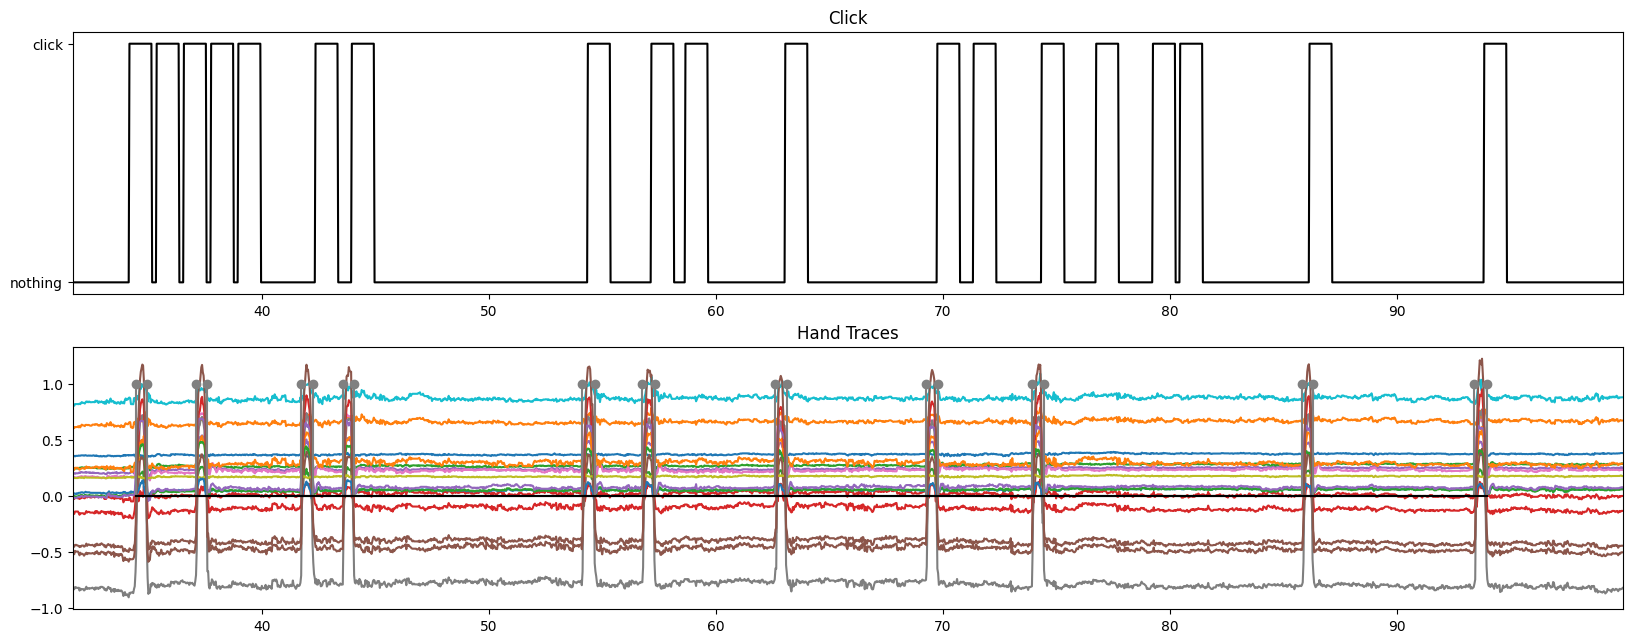

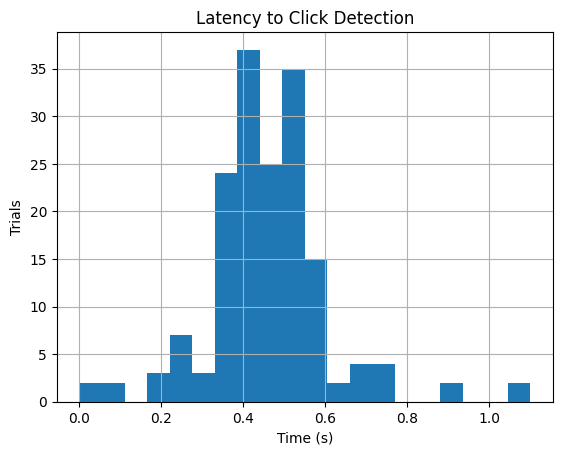

In [18]:
n_votes_thr = 2

# LOADING CLICK INFORMATION
click_trace = functions_speller_analysis_simulated.load_click_information(block_id, date, dir_intermediates, n_votes,\
                                                                          n_votes_thr, patient_id, task)

# ZOOMING IN
functions_speller_analysis_simulated.zooming_in(click_trace, hand_trajectories_rel, movement, movement_onsetsoffsets,\
                                                t_end_view, t_start_view)

# EXTRACTING CLICK ONSETS
t_click_onsets, _ = functions_speller_analysis_simulated.extracting_click_onset_offset_times(click_trace)

# COMPUTING LATENCIES AND TRUE POSITIVES
n_clicks,\
t_click_latencies = functions_speller_analysis_simulated.computing_latency_and_tp(movement, movement_onsetsoffsets,\
                                                                                  patient_id, t_after_movement_limit,\
                                                                                  t_click_onsets)

# COMPUTING FALSE POSITIVES
n_fp = functions_speller_analysis_simulated.computing_fp(movement, movement_onsetsoffsets, t_after_movement_limit,\
                                                         t_click_onsets)

n_click_dict[str(n_votes_thr) + '_thr'] = n_clicks

n_fp_dict[str(n_votes_thr) + '_thr'] = n_fp



CLICK TRACE:
<xarray.DataArray (time_seconds: 26846)>
array(['nothing', 'nothing', 'nothing', ..., 'click', 'click', 'click'],
      dtype=object)
Coordinates:
  * time_seconds  (time_seconds) float64 31.67 31.7 31.73 ... 926.4 926.5 926.5
['click', 'nothing']
Miss:  105.133
Miss:  113.467
Miss:  538.2
Miss:  604.933
N grasps:  176
N clicks:  172
Sensitivity:  97.73
Mean Latency to Command:  0.438
Stdev Latency to Command:  0.255
False Positives?
34.07
36.47
38.87
40.27
58.57
71.27
75.47
76.67
79.17
80.37
85.67
92.57
94.97
101.67
108.77
113.37
123.17
127.47
138.17
153.87
165.07
174.87
183.27
199.17
206.87
226.17
238.77
240.77
248.37
267.27
270.37
285.87
315.67
323.17
361.37
366.67
372.17
383.37
398.17
428.77
429.97
442.27
457.17
462.17
498.87
502.77
516.77
531.37
560.47
596.17
625.07
631.37
656.67
697.97
706.67
720.47
728.57
737.47
749.37
759.07
775.67
789.87
796.97
799.37
800.57
802.37
803.87
807.07
816.17
817.67
824.27
829.07
831.27
833.07
834.37
850.77
856.37
860.57
861.77
862.97
8

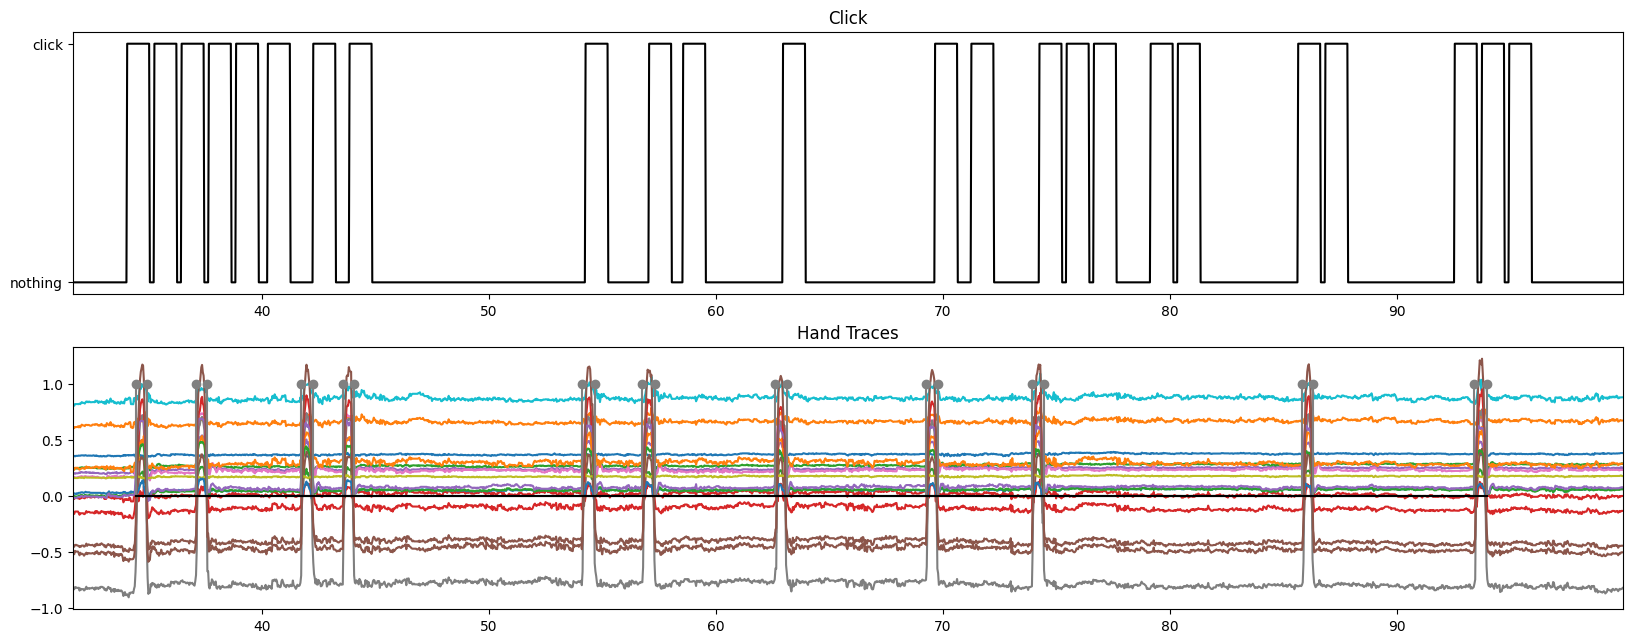

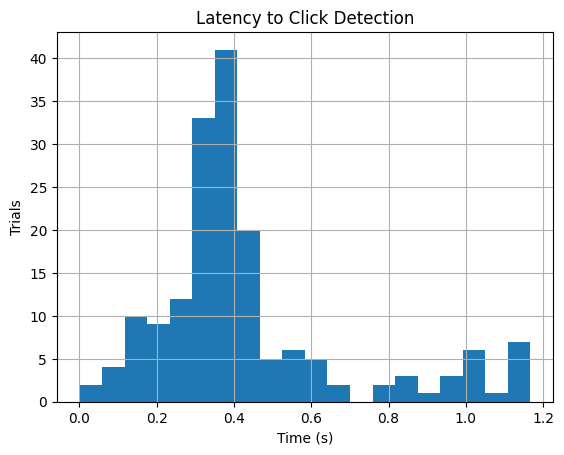

In [19]:
n_votes_thr = 1

# LOADING CLICK INFORMATION
click_trace = functions_speller_analysis_simulated.load_click_information(block_id, date, dir_intermediates, n_votes,\
                                                                          n_votes_thr, patient_id, task)

# ZOOMING IN
functions_speller_analysis_simulated.zooming_in(click_trace, hand_trajectories_rel, movement, movement_onsetsoffsets,\
                                                t_end_view, t_start_view)

# EXTRACTING CLICK ONSETS
t_click_onsets, _ = functions_speller_analysis_simulated.extracting_click_onset_offset_times(click_trace)

# COMPUTING LATENCIES AND TRUE POSITIVES
n_clicks,\
t_click_latencies = functions_speller_analysis_simulated.computing_latency_and_tp(movement, movement_onsetsoffsets,\
                                                                                  patient_id, t_after_movement_limit,\
                                                                                  t_click_onsets)

# COMPUTING FALSE POSITIVES
n_fp = functions_speller_analysis_simulated.computing_fp(movement, movement_onsetsoffsets, t_after_movement_limit,\
                                                         t_click_onsets)

n_click_dict[str(n_votes_thr) + '_thr'] = n_clicks

n_fp_dict[str(n_votes_thr) + '_thr'] = n_fp


In [20]:
n_click_dict

{'7_thr': 52,
 '6_thr': 108,
 '5_thr': 139,
 '4_thr': 152,
 '3_thr': 161,
 '2_thr': 167,
 '1_thr': 172}

In [21]:
n_fp_dict

{'7_thr': 3,
 '6_thr': 5,
 '5_thr': 8,
 '4_thr': 13,
 '3_thr': 20,
 '2_thr': 39,
 '1_thr': 86}